In [1]:
import torch
from torch import nn
from torchvision import datasets
from torchvision import transforms
import os
import json
from PIL import Image
import matplotlib.pyplot as plt
import random
import shutil
from torch.utils.data import DataLoader
from tqdm import tqdm
import gc

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu" )
# device = torch.device("cpu")
device

device(type='cuda')

In [ ]:

imgTransform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()]
)

foodDataset = datasets.Food101("../dataset", download=True)

In [4]:
os.getcwd()

'/home/infinity/Desktop/Learn Pytorch'

In [ ]:
BASE_FOOD_DS = os.path.join("../dataset/food-101")
print(BASE_FOOD_DS)
BASE_FOOD_IMGS = os.path.join(BASE_FOOD_DS, "images")
BASE_FOOD_META = os.path.join(BASE_FOOD_DS, "meta")
TRAIN_JSON_PATH = os.path.join(BASE_FOOD_META, "train.json")
TEST_JSON_PATH = os.path.join(BASE_FOOD_META, "test.json")
CLASSES_TEXT = os.path.join(BASE_FOOD_META, "classes.txt")

/home/infinity/Desktop/Learn Pytorch/dataset/food-101


In [6]:
TRAIN_JSON = json.load(open(TRAIN_JSON_PATH))
TEST_JSON = json.load(open(TEST_JSON_PATH))

In [7]:
TRAIN_JSON, TEST_JSON

({'churros': ['churros/1004234',
   'churros/1013460',
   'churros/1016791',
   'churros/102100',
   'churros/1025494',
   'churros/1029245',
   'churros/1029669',
   'churros/1031729',
   'churros/1037793',
   'churros/1062354',
   'churros/1064040',
   'churros/1066964',
   'churros/1067707',
   'churros/1071888',
   'churros/107235',
   'churros/1075103',
   'churros/1075574',
   'churros/1076994',
   'churros/1078896',
   'churros/1081831',
   'churros/1086460',
   'churros/1086967',
   'churros/1094673',
   'churros/1096129',
   'churros/1096756',
   'churros/1097647',
   'churros/1103507',
   'churros/1109507',
   'churros/1122259',
   'churros/1130092',
   'churros/1135011',
   'churros/1141049',
   'churros/1142539',
   'churros/1143913',
   'churros/115417',
   'churros/1154541',
   'churros/1155176',
   'churros/1160320',
   'churros/1166531',
   'churros/1168265',
   'churros/1168743',
   'churros/1170523',
   'churros/1171026',
   'churros/1176177',
   'churros/1176714',
  

In [8]:
CLASS_NAMES = []
with open(CLASSES_TEXT, "r") as f:
    for f_p in f.readlines():
        CLASS_NAMES.append(f_p.strip("\n"))
CLASS_NAMES[:5]

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare']

In [9]:
len(CLASS_NAMES)

101

In [10]:
len(TRAIN_JSON[CLASS_NAMES[5]])

750

In [11]:
TRAIN_JSON[CLASS_NAMES[5]][random.randint(0,750)]

'beet_salad/3484902'

carrot_cake
Img dim: 384
Img dim: 512


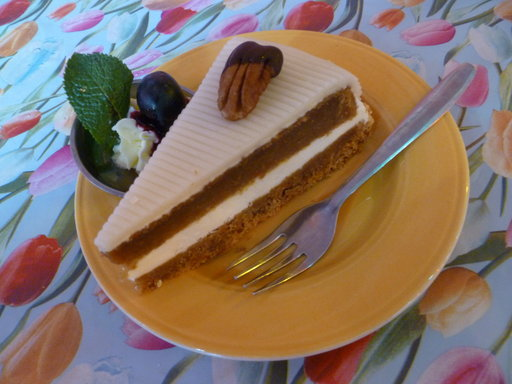

In [12]:
rand_Class_name = random.randint(0, len(CLASS_NAMES))

randImgPath =  os.path.join(BASE_FOOD_IMGS,TRAIN_JSON[CLASS_NAMES[rand_Class_name]][random.randint(0,750)]+".jpg")

img = Image.open(randImgPath)

print(CLASS_NAMES[rand_Class_name])
print("Img dim:", img.height)
print("Img dim:", img.width)
img


In [13]:
imgTransform(img).shape

torch.Size([3, 224, 224])

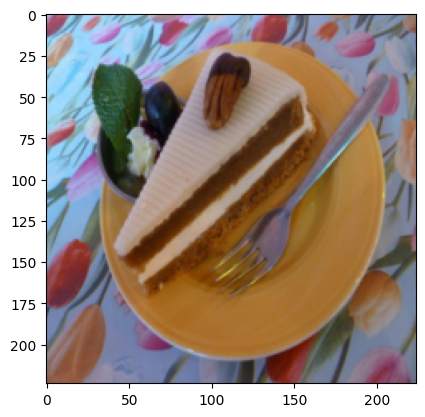

In [14]:
plt.imshow(imgTransform(img).permute(1,2,0))

In [ ]:
NEW_DS = "../dataset/food101_torch"

# run once
# creating dataset acording to pytorch format

#format = train/class_name/imgs 
#BASE_FOOD_IMGS,TRAIN_JSON[CLASS_NAMES[rand_Class_name]][random.randint(0,750)]+".jpg"



#train loop
if not os.path.exists(NEW_DS):
    os.makedirs(NEW_DS, exist_ok=True)
    for c_i , _class in enumerate(tqdm(CLASS_NAMES)):
        print(_class)
        class_path = os.path.join(NEW_DS, "train", _class)
        os.makedirs(class_path, exist_ok=True)
        i = 0
        for _img in range(0, len(TRAIN_JSON[CLASS_NAMES[0]])):
            img_path = os.path.join(class_path, str(i)+".jpg")
            # print(os.path.join(BASE_FOOD_IMGS,TRAIN_JSON[CLASS_NAMES[c_i][_img]]+".jpg"))
            shutil.copy(os.path.join(BASE_FOOD_IMGS,TRAIN_JSON[CLASS_NAMES[c_i]][_img]+".jpg"),  img_path)
            i+=1

    #test loop
    for c_i , _class in enumerate(tqdm(CLASS_NAMES)):
        print(_class)
        class_path = os.path.join(NEW_DS, "test", _class)
        os.makedirs(class_path, exist_ok=True)
        i = 0
        for _img in range(0, len(TEST_JSON[CLASS_NAMES[0]])):
            img_path = os.path.join(class_path, str(i)+".jpg")
            # print(os.path.join(BASE_FOOD_IMGS,TRAIN_JSON[CLASS_NAMES[c_i][_img]]+".jpg"))
            shutil.copy(os.path.join(BASE_FOOD_IMGS,TEST_JSON[CLASS_NAMES[c_i]][_img]+".jpg"),  img_path)
            i+=1

In [16]:
TRAIN_DATA_path = os.path.join(NEW_DS,"train")
TEST_DATA_path = os.path.join(NEW_DS,"test")

In [17]:
train_data = datasets.ImageFolder(TRAIN_DATA_path, transform=imgTransform, target_transform=None)
test_data = datasets.ImageFolder(TEST_DATA_path, transform=imgTransform, target_transform=None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 75750
     Root location: /home/infinity/Desktop/Learn Pytorch/dataset/food101_torch/train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 25250
     Root location: /home/infinity/Desktop/Learn Pytorch/dataset/food101_torch/test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [18]:
BATCH_SIZE = 32
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True)

In [19]:
len(train_loader), len(test_loader)

(2368, 790)

In [20]:
sample_batch_x, sample_batch_y = next(iter(train_loader))
sample_batch_x.shape, sample_batch_y.shape

sample_batch_x = sample_batch_x.to(device)
sample_batch_y = sample_batch_y.to(device)

In [21]:
# class TinyNet1(nn.Module):
#     def __init__(self,):
#         super().__init__()
#         self.cnn_block_1 = nn.Sequential(
#             nn.Conv2d(in_channels=3,
#                       out_channels=10,
#                       kernel_size=3,
#                       stride=1,
#                       padding=1),
#             nn.ReLU(),
#             nn.Conv2d(in_channels=10,
#                      out_channels=10,
#                      kernel_size=3,
#                      padding=1,
#                      stride=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2)
#         )
        
#         #block 2
#         self.cnn_block_2 = nn.Sequential(
#             nn.Conv2d(in_channels=10,
#                      out_channels=10,
#                      kernel_size=3,
#                      padding=1),
#             nn.ReLU(),
#             nn.Conv2d(in_channels=10,
#                      out_channels=10,
#                      kernel_size=3,
#                      padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2)
#         )
        
#         self.liner_layer1 = nn.Sequential(
#             nn.Flatten(),
#             nn.Linear(16*16*10,4096),
#             nn.ReLU(),
#             nn.Linear(4096,1024),
#             nn.ReLU(),
#             nn.Linear(1024,101),
#         )
#     def forward(self, x):
#         x = self.cnn_block_1(x)
#         x = self.cnn_block_2(x)

#         # print(x.shape)
#         x = self.liner_layer1(x)
#         return x

In [22]:
# class TinyNet1(nn.Module):
#     def __init__(self,):
#         super().__init__()
#         self.cnn_layer1 = nn.Sequential(
#             nn.Conv2d(3, 128, kernel_size=(3,3), padding=1, stride=1),
#             nn.ReLU(),
#             nn.Conv2d(128, 128, kernel_size=(3,3)),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=(2,2)),
#         )
#         self.cnn_layer2 = nn.Sequential(
#             nn.Conv2d(128, 256, kernel_size=(3,3), padding=1, stride=1),
#             nn.ReLU(),
#             nn.Conv2d(256, 256, kernel_size=(3,3)),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=(2,2)),
#         )
#         self.cnn_layer3 = nn.Sequential(
#             nn.Conv2d(256, 512, kernel_size=(3,3), padding=1, stride=1),
#             nn.ReLU(),
#             nn.Conv2d(512, 512, kernel_size=(3,3)),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=(2,2)),
#         )
#         self.liner_layer1 = nn.Sequential(
#             nn.Flatten(),
#             nn.Linear(14*14*512,4096),
#             nn.ReLU(),
#             nn.Linear(4096,1024),
#             nn.ReLU(),
#             nn.Linear(1024,101),
#         )
#     def forward(self, x):
#         x = self.cnn_layer1(x)
#         x = self.cnn_layer2(x)
#         x = self.cnn_layer3(x)
#         # print(x.shape)
#         x = self.liner_layer1(x)
#         return x

In [23]:
class ResidualBlock(nn.Module):
        def __init__(self, in_channels, out_channels, stride = 1, downsample = None):
            super(ResidualBlock, self).__init__()
            self.conv1 = nn.Sequential(
                            nn.Conv2d(in_channels, out_channels, kernel_size = 3, stride = stride, padding = 1),
                            nn.BatchNorm2d(out_channels),
                            nn.ReLU())
            self.conv2 = nn.Sequential(
                            nn.Conv2d(out_channels, out_channels, kernel_size = 3, stride = 1, padding = 1),
                            nn.BatchNorm2d(out_channels))
            self.downsample = downsample
            self.relu = nn.ReLU()
            self.out_channels = out_channels

        def forward(self, x):
            residual = x
            out = self.conv1(x)
            out = self.conv2(out)
            if self.downsample:
                residual = self.downsample(x)
            out += residual
            out = self.relu(out)
            return out

class ResNet(nn.Module):
        def __init__(self, block, layers, num_classes = 10):
            super(ResNet, self).__init__()
            self.inplanes = 64
            self.conv1 = nn.Sequential(
                            nn.Conv2d(3, 64, kernel_size = 7, stride = 2, padding = 3),
                            nn.BatchNorm2d(64),
                            nn.ReLU())
            self.maxpool = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)
            self.layer0 = self._make_layer(block, 64, layers[0], stride = 1)
            self.layer1 = self._make_layer(block, 128, layers[1], stride = 2)
            self.layer2 = self._make_layer(block, 256, layers[2], stride = 2)
            self.layer3 = self._make_layer(block, 512, layers[3], stride = 2)
            self.avgpool = nn.AvgPool2d(7, stride=1)
            self.fc = nn.Linear(512, num_classes)

        def _make_layer(self, block, planes, blocks, stride=1):
            downsample = None
            if stride != 1 or self.inplanes != planes:

                downsample = nn.Sequential(
                    nn.Conv2d(self.inplanes, planes, kernel_size=1, stride=stride),
                    nn.BatchNorm2d(planes),
                )
            layers = []
            layers.append(block(self.inplanes, planes, stride, downsample))
            self.inplanes = planes
            for i in range(1, blocks):
                layers.append(block(self.inplanes, planes))

            return nn.Sequential(*layers)

        def forward(self, x):
            x = self.conv1(x)
            x = self.maxpool(x)
            x = self.layer0(x)
            x = self.layer1(x)
            x = self.layer2(x)
            x = self.layer3(x)

            x = self.avgpool(x)
            x = x.view(x.size(0), -1)
            x = self.fc(x)

            return x
        

In [24]:
# net2 = TinyNet1()
# net2(sample_batch_x.to("cpu")).shape

In [25]:
# net1 = TinyNet1().to(device=device)
# with torch.inference_mode():
#     net_res = net1(sample_batch_x)

In [26]:
        
net1 = ResNet(ResidualBlock, [3, 4, 6, 3], num_classes=len(CLASS_NAMES)).to(device)

print(net1)

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer0): Sequential(
    (0): ResidualBlock(
      (conv1): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
      (conv2): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (relu): ReLU()
    )
    (1): ResidualBlock(
      (conv1): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affin

In [27]:
next(net1.parameters()).device

device(type='cuda', index=0)

In [28]:
# net_res.shape

In [29]:
# net_res[30]

In [30]:
# torch.argmax(net_res, dim=1)

In [31]:
total_param = 0
for i in net1.parameters():
    total_param+=i.numel()
print(total_param)

21344997


In [32]:
def acc_fn(y_preds, y):
    # print(y_preds)
    acc_score = torch.eq(y_preds, y).sum() / len(y)
    return acc_score

In [33]:

loss_fn = nn.CrossEntropyLoss().to(device)
optim_fn = torch.optim.Adam(params=net1.parameters(), lr=0.01)

In [34]:
net1.load_state_dict(torch.load("./f101_90acc.pt"))

/tmp/ipykernel_4830/3747371212.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net1.load_state_dict(torch.load("./f101_90acc.pt"))


<All keys matched successfully>

In [38]:
epochs = 1
for e in range(0, epochs):
    total_train_loss = 0
    total_train_acc = 0
    for x_train, y_train in tqdm(train_loader):
        with torch.inference_mode():
            x_train = x_train.to(device)
            y_train = y_train.to(device)

            y_logits = net1(x_train)
            # print(y_preds.shape, y_train.shape)
            train_loss = loss_fn(y_logits, y_train)
            total_train_loss+=train_loss

            total_train_acc+=acc_fn(torch.argmax(y_logits, dim=1), y_train)



            # optim_fn.zero_grad()
            # train_loss.backward()
            # optim_fn.step()

            del x_train, y_train, 
            torch.cuda.empty_cache()
            gc.collect()


    with torch.inference_mode():
        total_train_loss = total_train_loss / len(train_loader)
        total_train_acc = total_train_acc / len(train_loader)
        print("Total Train loss: ",total_train_loss, " | Total Train Acc:",total_train_acc)

100%|██████████| 2368/2368 [09:43<00:00,  4.06it/s]

Total Train loss:  tensor(0.2219, device='cuda:0')  | Total Train Acc: tensor(0.9319, device='cuda:0')


In [35]:
total_test_loss, total_test_acc = 0,0
# acc on test data
for idx, (batch_test_x, batch_test_y) in enumerate(tqdm(test_loader)):
    with torch.inference_mode():
        batch_test_x = batch_test_x.to(device)
        batch_test_y = batch_test_y.to(device)

        
        y_logits = net1(batch_test_x)
        test_loss = loss_fn(y_logits, batch_test_y)
        total_test_loss+=test_loss

        total_test_acc+=acc_fn(torch.argmax(torch.softmax(y_logits, dim=1), dim=1),batch_test_y)

    # print("Train loss:", train_loss)
with torch.inference_mode():
    total_test_loss = total_test_loss / len(test_loader)
    total_test_acc = total_test_acc / len(test_loader)
    print("Total Test loss: ",total_test_loss, "Test Acc: ",total_test_acc)

100%|██████████| 790/790 [01:16<00:00, 10.29it/s]


Total Test loss:  tensor(2.9195, device='cuda:0') Test Acc:  tensor(0.4691, device='cuda:0')


In [40]:
torch.save(net1, "f101_93_train.pt")